<a href="https://colab.research.google.com/github/SteveOat/Hit-Song/blob/main/%E0%B9%80%E0%B8%AD%E0%B8%B2%E0%B8%AD%E0%B8%B1%E0%B8%99%E0%B8%99%E0%B8%B5%E0%B9%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display_html

df_1 = pd.read_csv('Hot100.csv')
df_2 = pd.read_csv('ClassicHit.csv')

<h1>Preparing Data

Remove **spaces (" ")**  from "Track" column to match the text format of song's name.

In [ ]:
df_1['Track'] = df_1['Track'].str.replace(' ','')
df_2['Track'] = df_2['Track'].str.replace(' ','')

In [ ]:
df_1_track_html = df_1['Track'].head(5).to_frame().to_html()
df_2_track_html = df_2['Track'].head(5).to_frame().to_html()

html_str = df_1_track_html + '<div style="display: inline-block; width: 20px;"></div>' + df_2_track_html

display_html(html_str, raw=True)

,Track
0,7rings
1,BreakFree
2,DangerousWoman
3,Godisawoman
4,IntoYou
,Track
0,HeyJackKerouac
1,LiketheWeather
2,What'stheMatterHere?
3,TroubleMe


Select the "Genre" column from the "df_2" table to merge it with the "df_1" table, where the song names and artists match.

Delete the duplicate rows, then merge the rows that have the same song name but are sung by different artists to differentiate them.

In [ ]:
df_3 = df_2[['Track', 'Artist','Genre']]
df_final = pd.merge( df_1, df_3, left_on=['Track','Artist'], right_on=['Track','Artist'], how='left' )
df_final.drop_duplicates(subset=['Track', 'Artist'], keep='first', inplace=True)
df_final['Track_n_artist'] = df_final['Track'] + '_' + df_final['Artist']

df_final.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre,Track_n_artist
0,7rings,Ariana Grande,"thank u, next",2019,178626,4,0.780,0.321,1,-10.747,0,0.3720,0.56200,0.000000,0.0881,0.315,139.961,50,Today,7rings_Ariana Grande
1,BreakFree,Ariana Grande,My Everything - Deluxe,2014,214840,4,0.686,0.702,7,-5.325,0,0.0455,0.00637,0.000045,0.2040,0.290,129.948,76,Today,BreakFree_Ariana Grande
2,DangerousWoman,Ariana Grande,Dangerous Woman,2016,235946,3,0.664,0.602,4,-5.369,0,0.0412,0.05290,0.000000,0.3560,0.289,134.049,70,Today,DangerousWoman_Ariana Grande
3,Godisawoman,Ariana Grande,Sweetener,2018,197546,4,0.602,0.658,1,-5.934,1,0.0558,0.02330,0.000060,0.2370,0.268,145.031,75,Today,Godisawoman_Ariana Grande
4,IntoYou,Ariana Grande,Dangerous Woman,2016,244453,4,0.623,0.734,9,-5.948,1,0.1070,0.01620,0.000002,0.1450,0.370,107.853,71,Today,IntoYou_Ariana Grande


<hr>

<h1>Clustering Data

**1. Key**
*   Musical key of the track, represented by integers (0 = C, 1 = C#/Db, etc.).



In [ ]:
df_final['Cluster_Key'] = np.where(df_final['Key'] == 0, 'C',
                                         np.where(df_final['Key'] == 1, 'C#/Db',
                                        np.where(df_final['Key'] == 2, 'D',
                                        np.where(df_final['Key'] == 3, 'Eb',
                                        np.where(df_final['Key'] == 4, 'E',
                                        np.where(df_final['Key'] == 5, 'F',
                                        np.where(df_final['Key'] == 6, 'F#/Gb',
                                        np.where(df_final['Key'] == 7, 'G',
                                        np.where(df_final['Key'] == 8, 'G#/Ab',
                                        np.where(df_final['Key'] == 9, 'A',
                                        np.where(df_final['Key'] ==  10, 'A#/Bb',
                                        np.where(df_final['Key'] ==  11, 'B',''))))))))))))

**2. Mode**
* Indicates whether the track is in a major (1) or minor (0) key.

In [ ]:
df_final['Cluster_Mode'] = np.where(df_final['Mode'] == 0, 'Minor',
                                      np.where(df_final['Mode'] == 1, 'Major',''))

**3. Duration**
- Length of the track, usually in milliseconds.
 - Short: 0 - 180,000 ms (0 - 3 minutes)
 - Medium: 180,001 - 300,000 ms (3 - 5 minutes)
 - Long: 300,001 ms and above (5+ minutes)

In [ ]:
df_final['Cluster_Duration(Min)'] = np.where(df_final['Duration'] < 180000, '0-3mins',
                                                  np.where(df_final['Duration'] < 300000, '3-5mins', '5+mins'))

**4. Danceability**
- How suitable a track is for dancing, from 0.0 to 1.0.
 - Low: 0.0 - 0.4 (e.g., classical, ambient)
 - Medium: 0.4 - 0.7 (e.g., soft rock, indie)
 - High: 0.7 - 1.0 (e.g., pop, dance, hip-hop)

In [ ]:
df_final['Cluster_Danceability'] = np.where(df_final['Danceability'] <= 0.4, 'Low_Dance',
                                               np.where(df_final['Danceability'] <= 0.7, 'Mid_Dance',
                                               np.where(df_final['Danceability'] <=  1,'High_Dance','')))

**5. Energy**
- Measure of intensity and activity in the track, from 0.0 to 1.0.
 - Low Energy: 0.0 - 0.4 (e.g., acoustic, ambient, soft ballads)
 - Medium Energy: 0.4 - 0.7 (e.g., indie rock, chill electronic)
 - High Energy: 0.7 - 1.0 (e.g., EDM, rock, fast-paced pop)

In [ ]:
df_final['Cluster_Energy'] = np.where(df_final['Energy'] <= 0.4, 'Low_Energy',
                                        np.where(df_final['Energy'] <= 0.7, 'Mid_Energy',
                                        np.where(df_final['Energy'] <=  1, 'High_Energy','')))

**6.Loudness**
- Spotify offers three loudness settings to control how normalization is applied:

 - Loud : This applies a normalization level of around -11 dB LUFS, suitable for noisier environments where higher volume is needed.
 - Normal (default) : This is the standard setting at -14 dB LUFS, aiming for balanced playback across all tracks.
 - Quiet : This setting lowers the loudness normalization target to -23 dB LUFS, ideal for quiet environments or more dynamic listening experiences.

In [ ]:
df_final['Cluster_Loudness'] = np.where(df_final['Loudness'] >= -11, 'High_Loud',
                                            np.where(df_final['Loudness'] >= -14, 'Mid_Loud', 'Low_Loud'))

**7. Speechiness**
-  Detects the presence of spoken words in a track, from 0.0 to 1.0.
 - Low Speechiness: 0.0 - 0.33 (e.g., music without much spoken word)
 - Medium Speechiness: 0.33 - 0.66 (e.g., tracks with both music and speech, like rap)
 - High Speechiness: 0.66 - 1.0 (e.g., podcasts, spoken word tracks)

In [ ]:
df_final['Cluster_Speechiness'] = np.where(df_final['Speechiness'] <= 0.333, 'Low_Speech',
                                               np.where(df_final['Speechiness'] <= 0.666, 'Mid_Speech',
                                               np.where(df_final['Speechiness'] <=  1, 'High_Speech','')))

**8. Acousticness**
- Confidence level that the track is acoustic, from 0.0 to 1.0.
 - Low Acousticness: 0.0 - 0.3 (e.g., electronic, heavily produced)
 - Medium Acousticness: 0.3 - 0.7 (e.g., some balance between acoustic and electronic elements)
 - High Acousticness: 0.7 - 1.0 (e.g., acoustic tracks, singer-songwriter)

In [ ]:
df_final['Cluster_Acousticness'] = np.where(df_final['Acousticness'] <= 0.3, 'Low_Acoustic',
                                                np.where(df_final['Acousticness'] <= 0.7, 'Mid_Acoustic',
                                                np.where(df_final['Acousticness'] <=  1, 'High_Acoustic','')))

**9. Instrumentalness**
- Probability that the track contains no vocals, from 0.0 to 1.0.
 - Vocal-heavy: 0.0 - 0.1 (most mainstream music)
 - Medium Instrumentalness: 0.1 - 0.5 (vocals present but not dominant)
 - Instrumental: 0.5 - 1.0 (mostly instrumental, no vocals)

In [ ]:
df_final['Cluster_Instrumentalness'] = np.where(df_final['Instrumentalness'] <= 0.1, 'Low_Instru',
                                                      np.where(df_final['Instrumentalness'] <= 0.5, 'Mid_Instru',
                                                      np.where(df_final['Instrumentalness'] <=  1, 'High_Instru','')))

**10. Liveness**
- Detects the presence of a live audience in the recording, from 0.0 to 1.0.
 - Studio-like: 0.0 - 0.3 (recorded in a studio without live ambiance)
 - Medium Liveness: 0.3 - 0.6 (some audience noise or live characteristics)
 - Live Recording: 0.6 - 1.0 (recorded live in concert with audience presence)

In [ ]:
df_final['Cluster_Liveness'] = np.where(df_final['Liveness'] <= 0.3, 'Studio_Liveness','Outdoor_Liveness')

**11. Valence**
- Describes the musical positiveness conveyed by a track, from 0.0 to 1.0.
 - Low Valence: 0.0 - 0.3 (e.g., sad, melancholic tracks)
 - Medium Valence: 0.3 - 0.6 (e.g., neutral or emotionally mixed tracks)
 - High Valence: 0.6 - 1.0 (e.g., happy, cheerful, upbeat tracks)

In [ ]:
df_final['Cluster_Valence'] = np.where(df_final['Valence'] <= 0.3, 'Low_Valence',
                                         np.where(df_final['Valence'] <= 0.6, 'Mid_Valence',
                                         np.where(df_final['Valence'] <=  1, 'High_Valence','')))

**12. Tempo**
- Speed of the track in beats per minute (BPM).
 - Slow: 0 - 60 BPM (e.g., ballads, ambient music)
 - Medium: 60 - 120 BPM (e.g., pop, mid-tempo rock)
 - Fast: 120 - 180+ BPM (e.g., dance, EDM, upbeat tracks)

In [ ]:
df_final['Cluster_Tempo'] = np.where(df_final['Tempo'] <= 60 , 'Low_Tempo',
                                       np.where(df_final['Tempo'] <= 120 , 'Mid_Tempo', 'High_Tempo'))

<hr>

<h1>Challenge

<h1>Pearson's

In [ ]:
from scipy.stats import pearsonr

# Example: Load your data into a DataFrame
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('Pearson_material.csv')

# List to store results
correlation_results = {}

# Calculate Pearson's r for each feature against 'Popularity'
for column in df.columns:
    if column != 'Streams':
        # Calculate Pearson's r using pandas
        correlation = df['Streams'].corr(df[column])

        # Alternatively, calculate Pearson's r using scipy
        # correlation, _ = pearsonr(df['Popularity'], df[column])

        correlation_results[column] = correlation

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results.items(), columns=['Feature', 'Pearson_r'])
print(correlation_df)

             Feature  Pearson_r
0           Duration   0.114120
1     Time_Signature   0.016736
2       Danceability   0.003988
3             Energy  -0.120006
4                Key  -0.079695
5           Loudness  -0.028149
6               Mode  -0.038582
7        Speechiness  -0.025790
8       Acousticness   0.099209
9   Instrumentalness   0.089646
10          Liveness   0.000527
11           Valence  -0.097101
12             Tempo  -0.058948


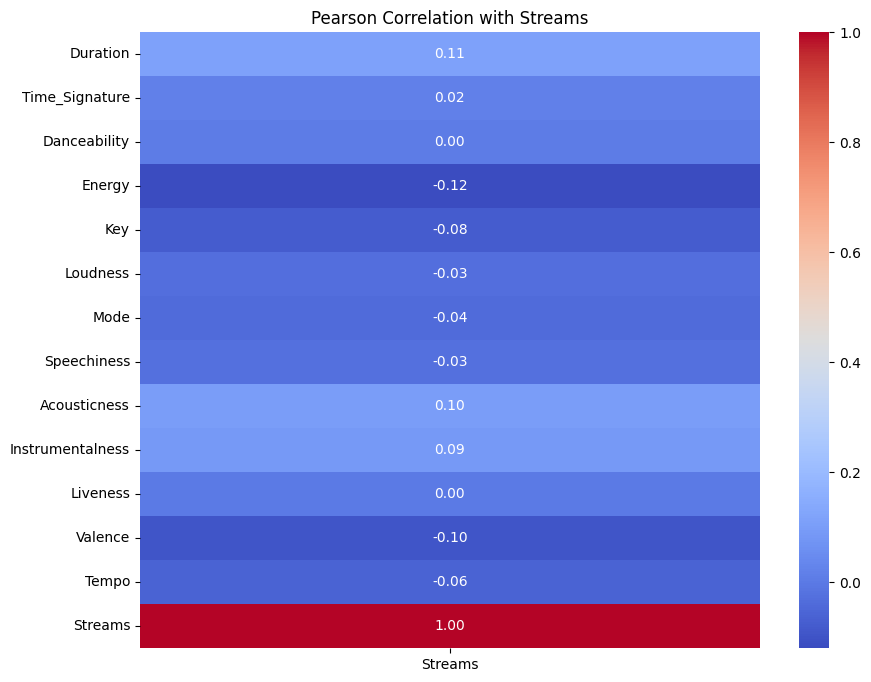

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame and 'Popularity' is the target column
popularity_corr = df.corr()[['Streams']]  # Select only the 'Popularity' row

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(popularity_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation with Streams")
plt.show()

In [ ]:
import plotly.express as px

fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

<hr>

<h1>Test graph

In [ ]:
!pip install plotly==5.15.0



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [ ]:
fig = make_subplots(
    rows=3,
    cols=3,
    subplot_titles=('<i>Popularity', '<i>Danceability', '<i>Energy', '<i>Loudness', '<i>Speechiness', '<i>Acousticness', '<i>Liveness', '<i>Valence', '<i>Tempo')
)

fig.add_trace(go.Histogram(x=df_final['Popularity'], name='Popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_final['Danceability'], name='Danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_final['Energy'], name='Energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df_final['Loudness'], name='Loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_final['Speechiness'], name='Speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df_final['Acousticness'], name='Acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df_final['Liveness'], name='Liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df_final['Valence'], name='Valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df_final['Tempo'], name='Tempo'), row=3, col=3)

fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark', title_x=0.5)

# Show the figure
fig.show()


<hr>